<a href="https://colab.research.google.com/github/arraiyopensource/kornia-examples/blob/master/color_adjust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color adjustment

In this tutorial we are goin to learn how to adjust the color in image batches.

In [34]:
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explanation



1.   Load the image and create a batch.
2.   Use the `kornia.color` API to adjust image tensors.



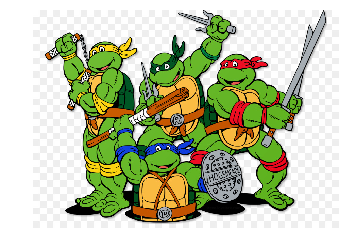

In [35]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# load using opencv and convert to 
img_bgr: np.array = cv2.imread('ninja_turtles.jpg', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

## 1. Create a batch

In [36]:
import torch
import torchvision

!pip install git+https://github.com/arraiyopensource/kornia
import kornia

def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np); plt.axis('off');

  Cloning https://github.com/arraiyopensource/kornia to /tmp/pip-req-build-zu6xpa7_
  Running command git clone -q https://github.com/arraiyopensource/kornia /tmp/pip-req-build-zu6xpa7_
  Created wheel for kornia: filename=kornia-0.1.2+4067336-py2.py3-none-any.whl size=110458 sha256=0de7776e2120c722395da7a2d12758f21c80c43ada98431e14f86d8390142809
  Stored in directory: /tmp/pip-ephem-wheel-cache-gm8au32w/wheels/a0/47/86/854e2f9a801b368f296cb25f167cbd56aa805f974b15421a67
Successfully built kornia


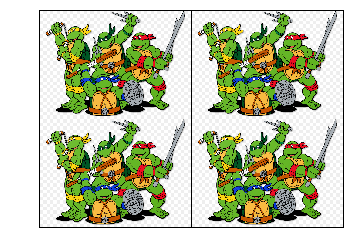

In [37]:
# stack four identical images
data: torch.Tensor = kornia.image_to_tensor(img_rgb)  # 1xCxHxW
data = data.expand(4, -1, -1, -1)  # 4xCxHxW

# normalize
data = kornia.normalize(data.float(), torch.zeros(3), 255. * torch.ones(3))

# plot
imshow(data)

## 2. Perform the color adjustments

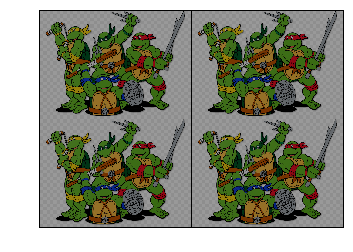

In [38]:
# Brightness
x_brightness: torch.Tensor = kornia.adjust_brightness(data, 0.6)
imshow(x_brightness)

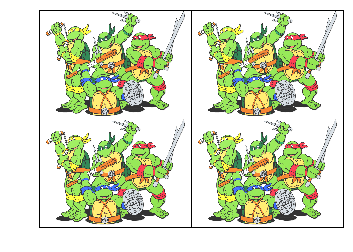

In [39]:
# Contrast
x_contrast: torch.Tensor = kornia.adjust_contrast(data, 0.2)
imshow(x_contrast)

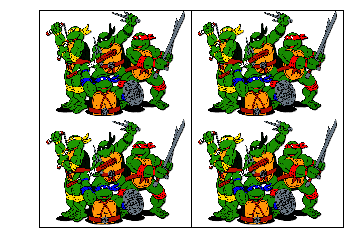

In [40]:
# Gamma
x_gamma: torch.Tensor = kornia.adjust_gamma(data, gamma=3., gain=1.5)
imshow(x_gamma)

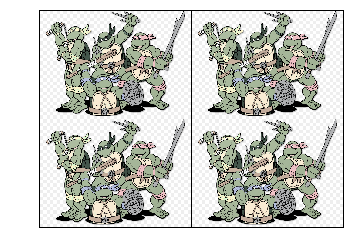

In [41]:
# Saturation
x_saturated: torch.Tensor = kornia.adjust_saturation(data, 0.2)
imshow(x_saturated)

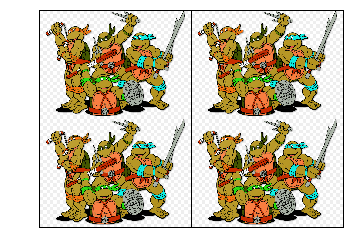

In [42]:
# Hue
x_hue: torch.Tensor = kornia.adjust_hue(data, 0.5)
imshow(x_hue)